# Hertz experimento


![imagen](img_mont/circuit.png)

- $V_{G1K} = 1.5 [V]$ es el voltaje entre el filamento y la grilla 1 usada para incitar a los electrones a moverse en cierta dirección
- $K=1.9[V]$ el voltaje del filamento, asegurese de leer el limite dado por el fabricante para su lampara
- $V_{G2K} = V[V]$ es el voltaje variado en el experimento, corresponde a la aceleración, a la energia que le entregamos
- $V_{G2A}$ es el voltaje retardante, corresponde a un filtrado, de manera que los electrones que pierden energia al reaccionar con el argón no lleguen hasta el punto A a ser registrados como corriente
- $A$ corresponde al amperimetro, donde registramos la llegada del electron mediante corriente


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel("DataHertz.xlsx", sheet_name="Sheet2")
df1

,VG2A [V],VG2K [V],IA [E-10 A],Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,5,6.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,7.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,8.0,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,9.0,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10.0,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,5,75.0,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,5,76.0,391,NaN,NaN,NaN,NaN,multiplos,NaN,NaN,NaN,NaN,Promedio
59,5,78.0,359,NaN,NaN,NaN,n=1,12,12.0,11.5,11.5,11.5,11.7
60,5,79.0,326,NaN,NaN,NaN,n=2,23.5,23.0,23.0,NaN,NaN,11.583333


In [3]:
# notese que aqui estan las unidades
df1 = df1[['VG2K [V]','IA [E-10 A]']]
df1 =df1.rename(columns={'VG2K [V]':'V','IA [E-10 A]':'I'})
# df1.to_csv('hertz_processed.csv')
df1

,V,I
0,6.4,0
1,7.0,13
2,8.0,63
3,9.0,100
4,10.0,118
...,...,...
57,75.0,389
58,76.0,391
59,78.0,359
60,79.0,326


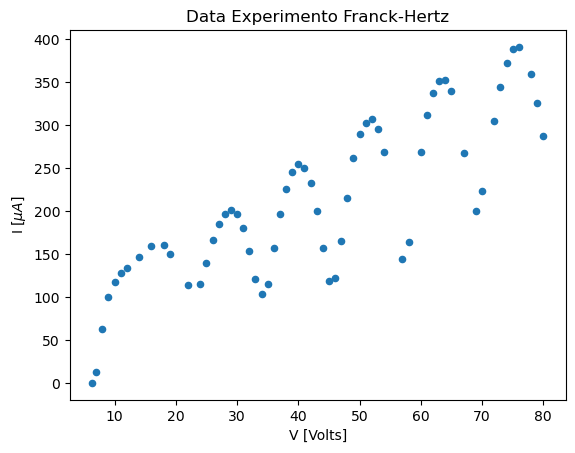

In [9]:
df1.plot(kind='scatter', y='I', x='V')
plt.xlabel('V [Volts]')
plt.ylabel(r'I [$\mu A$]')
plt.title('Data Experimento Franck-Hertz')
plt.savefig('plots/data_hertz.png', dpi=300)
plt.show()

In [10]:
df1['minV'] = df1.V[(df1.I.shift(1) >= df1.I) & (df1.I.shift(-1) >= df1.I)]
df1['maxV'] = df1.V[(df1.I.shift(1) < df1.I) & (df1.I.shift(-1) < df1.I)]

df1

,V,I,minV,maxV
0,6.4,0,NaN,NaN
1,7.0,13,NaN,NaN
2,8.0,63,NaN,NaN
3,9.0,100,NaN,NaN
4,10.0,118,NaN,NaN
...,...,...,...,...
57,75.0,389,NaN,NaN
58,76.0,391,NaN,76.0
59,78.0,359,NaN,NaN
60,79.0,326,NaN,NaN


In [11]:
minV = df1['minV'].dropna()
minI = df1.I[df1['V'].isin( minV )]

print( list(zip(minV, minI)) )

maxV = df1['maxV'].dropna()
maxI = df1.I[df1['V'].isin( maxV )]

print( list(zip(maxV, maxI)) )

[(22.0, 114), (34.0, 103), (45.0, 119), (57.0, 144), (69.0, 200)]
[(18.0, 160), (29.0, 201), (40.0, 255), (52.0, 307), (64.0, 352), (76.0, 391)]


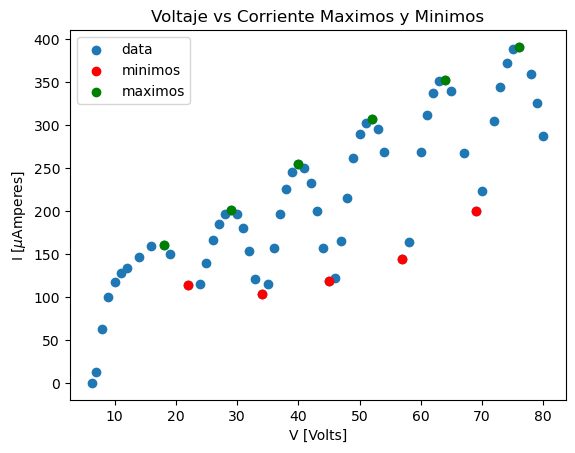

In [14]:
plt.title('Voltaje vs Corriente Maximos y Minimos')
plt.scatter(data=df1, y='I', x='V', label='data')
plt.scatter(minV  , minI, c='r',label='minimos')
plt.scatter(maxV, maxI, c='g',label='maximos')
plt.xlabel('V [Volts]')
plt.ylabel(r'I [$\mu$Amperes]')
plt.legend()
plt.savefig('plots/voltaje_vs_corriente_hertz.png',dpi=300)
plt.show()

### los puntos de importancia
Los voltajes medidos son los voltajes de aceleración $V_{G2K}$

cuando los electrones alcanzan una energia $e V_0$ entonces pueden transmitir su energia cinetica a una exitación discreta del atomo de la lampara; luego esa energia se vuelve a presentar en multiplos $n e V_0$


- elijase los minimos o maximos
- tomesé la diferencia de voltaje entre los puntos
- la diferencia de voltaje

#### diferencias fijas de drops
demostrar que hay diferencias fijas entre los peaks, demuestra que el argón tiene niveles de exitacion que absorben energia en cantidades cuantizadas

In [50]:
# la energia base e V0
maxV 

9     18.0
17    29.0
28    40.0
40    52.0
49    64.0
58    76.0
Name: maxV, dtype: float64

In [62]:
# 29-18, 40-29, 52-40, ...
DeltaVmax = maxV[1::].values - maxV[:-1:].values
DeltaVmax

array([11., 11., 12., 12., 12.])

In [63]:
# mientras que para los minimos
DeltaVmin = minV[1::].values - minV[:-1:].values
DeltaVmin

array([12., 11., 12., 12.])

In [69]:
V0_series = np.append(DeltaVmax, DeltaVmin)
# todas las mediciones de la energia base:
V0_series

array([11., 11., 12., 12., 12., 12., 11., 12., 12.])

In [ ]:
# boxplot


In [79]:
# estimador 
V0 = np.mean(V0_series)
print(V0)

11.666666666666666


La linea de emisión para la ampolleta es de
$$
\lambda = 108.1 \times 10^{-9} [m]
$$

entonces ocurre que:
$$
E = e V_0 = h f = h c / \lambda
$$

por tanto podemos despejar la constante de placnk y la velocidad de la luz
$$
hc = \lambda e V_0
$$

In [92]:
# primero encontramos hc

wavelength = 108.1 # 10^-9 [m]
#c = 3 # 10^8 [m/s]
e = 1.602176634 # 10^-19 [J/V]

#stimador
V0 # [V]


hc = wavelength * e  * V0  # 10^(-9-19) = 10^-28[J m]
 
hc = hc / 1000  # 10^{-25} [Jm]
hc

# el valor moderno es de 1.9845586 * 10^{-25} [Jm]

2.0206117649129998

In [93]:
hcmodern =  1.9845586 
100*(hc - hcmodern)/hcmodern
# error de 1.81%

1.8166843202815888

In [83]:
wavelength = 108.1 # 10^-9 [m]
c = 3 # 10^8 [m/s]
e = 1.602176634 # 10^-19 [J/V]

#stimador
V0 # [V]

h = wavelength * e  * V0 / c # 10^-36 [J s]
h = h / 100 # 10^{-34} [Js]
h

# modern value of h = 6.62607 10^{-34} [Js]

6.735372549709999

In [86]:
realh = 6.62607015

100*(h - realh)/realh
# 1.6 % de error

1.649581082536515

# Fast Fourier Transform
La transformada de Fourier discreta aplicada a estos datos nos entrega informacion sobre las oscilaciones presentes

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel("DataHertz.xlsx", sheet_name="Sheet2")
# notese que aqui estan las unidades
df1 = df1[['VG2K [V]','IA [E-10 A]']]
df1 =df1.rename(columns={'VG2K [V]':'V','IA [E-10 A]':'I'})


In [2]:
x = df1.V.values
y = df1.I.values

ck = np.fft.fft(y)
#y_rec = np.fft.irfft(ck)
ck[:5]

array([13156.           +0.j        ,    87.3184989 +2424.20696102j,
        -499.28872558+1230.09595984j,  -350.99381198 +814.66695258j,
        -300.84090689+1114.83570787j])

In [7]:
# cual es mi intervalo de datos
print('max',np.max(x))
print('min',np.min(x))
T = np.max(x) - np.min(x)
print('T:', T)

print('sampling rate o d:', N/T)

max 80.0
min 6.4
T: 73.6
sampling rate o d: 0.8423913043478262


sampling rate: 7.957747154594767
frecuencia nyquist (max que podemos leer): 3.9788735772973833


Text(0.5, 1.0, 'Espectro de Frecuencia')

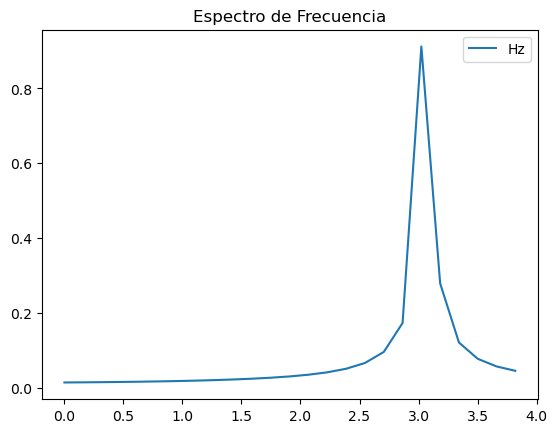

In [56]:

# y = 1*np.sin(2*np.pi* 3*x) + 2*np.cos(2*np.pi* 5*x)
t = np.linspace(0, 2* np.pi, 50)
T = np.max(t) - np.min(t)

f = 1 / T
# y = np.sin(2*np.pi*8*x) 
# y = np.cos(8*x) 
y = np.exp(1j*2*np.pi* 3 * t)

# datos
data = y
N = len(y) 

print('sampling rate:', N/T)
print('frecuencia nyquist (max que podemos leer):', N/2/T)

# fourier transform
ft = np.fft.fft(data)
mgft = abs(ft) / N

fVals = np.fft.fftfreq( len(data) ) * N / T

# hasta la 2da 
plt.plot(fVals[:int(len(mgft)/2)], mgft[:int(len(mgft)/2)], label='Hz')

plt.legend()
plt.title('Espectro de Frecuencia')
